In [1]:
import Base
import Parser.CircuitParserCalc as cpc
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm
import numpy as np
%matplotlib widget

interactive(children=(FloatSlider(value=10.0, description='r0', max=200.0, step=1.0), FloatSlider(value=100.0,…

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
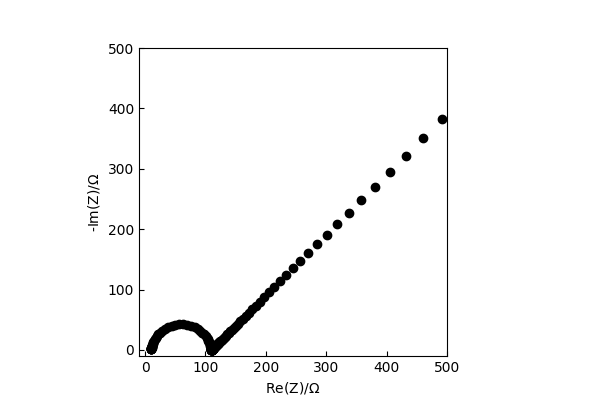

In [8]:
# set up plot
plt.close()
fig, ax = plt.subplots(figsize=(6, 4))
ax.grid(True)
cb = None
fig.clear()
ax = plt.gca()
circuit = 'R0-p(R1,CPE1)-W1'
circuit
freq = np.logspace(-3, 12, 200)
param = {
        "R0": 10,
        "R1": 100,
        "R2": 200,
        "C1": 1e-8,
        "CPE1_0": 1e-9,
        "CPE1_1": 0.809,
        "CPE2_0": 1e-9,
        "CPE2_1": 0.5,
        "W1": 300,
        "Ws1_R": 100,
        "Ws1_T": 10 ** 1,
        "Wo1_R": 100,
        "Wo1_T": 10 ** 1,
        "Wss1_R": 100,
        "Wss1_T": 10 ** 1
        }
norm = matplotlib.colors.Normalize(vmin=0, vmax=2, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.bwr)
res = cpc.calc_circuit(param, circuit, freq)
scat = ax.scatter(
            res.real,
            -res.imag,
            cmap='bwr',
            norm=norm
            )
cb = fig.colorbar(mapper, label=r"$\omega\cdot\tau$ in multiples of $2\pi$")
ax.set_aspect('equal')
ax.set_xlim(-10, 500)
ax.set_ylim(ax.get_xlim())
x_label = r"Re(Z)/$\Omega$"
y_label = r"-Im(Z)/$\Omega$"
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.tick_params(direction='in')
 
@widgets.interact(r0=(0, 200.0, 1.0), r1=(0.1, 600.0, 1.0), ws_r=(0.0, 400.0, 1.0), ws_t=(0.0, 5.0, 0.1),color=False, continuous_update=False)
def update(r0 = 10.0,r1 = 100, ws_r=100.0, ws_t=1.0, color=False):
    """Remove old lines from plot and plot new one"""
    param = {
            "R0": r0,
            "R1": r1,
            "R2": 200,
            "C1": 1e-8,
            "CPE1_0": 1e-12,
            "CPE1_1": 0.9,
            "CPE2_0": 1e-9,
            "CPE2_1": 0.899,
            "W1": 3 * ws_r,
            "Ws1_R": ws_r,
            "Ws1_T": 10 ** ws_t,
            "Wo1_R": ws_r,
            "Wo1_T": 10 ** ws_t,
            "Wss1_R": ws_r,
            "Wss1_T": 10 ** ws_t
            }
    res = cpc.calc_circuit(param, circuit, freq)
    scat.set_offsets(np.c_[res.real,-res.imag])
    if color:
        scat.set_facecolor(mapper.to_rgba(freq * param["Ws1_T"] / 2 / np.pi))
        fig.axes[1].set_visible(True)
    else:
        scat.set_facecolor('black')
        fig.axes[1].set_visible(False)